In [5]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from numpy.fft import fft, fftfreq

In [17]:
file_name = 'source_17/acisf05031_001N021_r0097h_lc3.fits'
result = fits.open(file_name)
result.info()
result[1].header['TIMEDEL']

Filename: source_17/acisf05031_001N021_r0097h_lc3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  LIGHTCURVE    1 BinTableHDU    163   3975R x 5C   [1D, 1D, 1D, 1D, 1D]   
  2  BKGLIGHTCURVE    1 BinTableHDU    169   3975R x 5C   [1D, 1D, 1D, 1D, 1D]   


16.672176063061

Resolution = 16.67217606306076 s


Text(0.5, 1.0, 'plot of source_17/acisf05031_001N021_r0097h_lc3.fits')

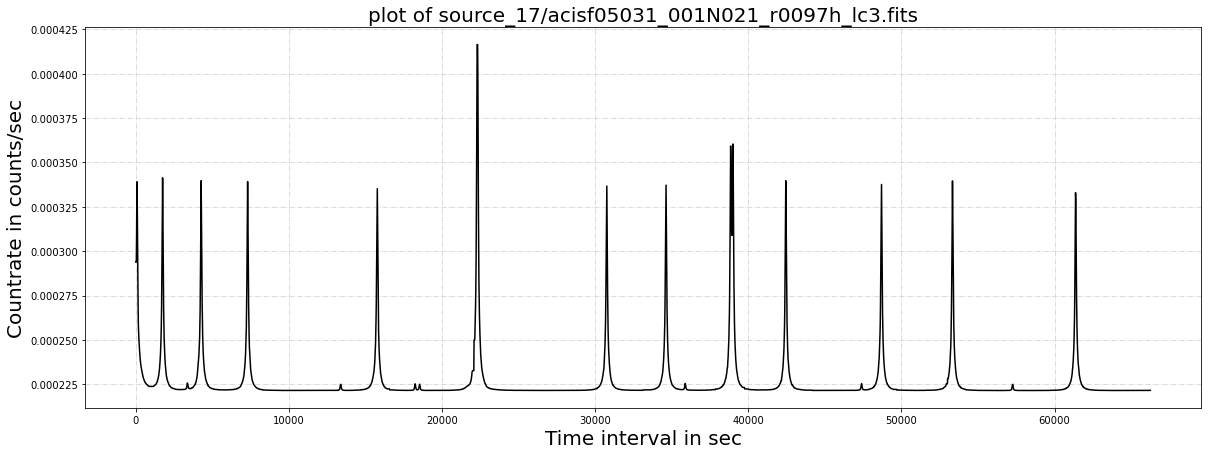

In [18]:
lc = result[1].data #Lightcurve
bg = result[2].data #Background

time = lc['Time']
resolution = time[1]-time[0]
print(f'Resolution = {resolution} s')
lc_count_rate = lc['COUNT_RATE']
lc_count_rate_err = lc['COUNT_RATE_ERR']


dt = time - time[0]

plt.figure(figsize = [20,7], facecolor = 'w')
plt.plot(dt, lc_count_rate, c = 'k')
#plt.scatter(dt, lc_count_rate, c = 'k', zorder = 1)
#plt.errorbar(dt, lc_count_rate, lc_count_rate_err, fmt = 'none', c = 'pink', zorder = 0)
plt.grid(color = 'lightgrey', ls = '-.')
plt.xlabel('Time interval in sec', fontsize = 20)
plt.ylabel('Countrate in counts/sec', fontsize = 20)
plt.title(f'plot of {file_name}', fontsize = 20)
#plt.text(10000,2.8e-5, s = f'resolution = {resolution} s', fontsize = 20)
#plt.xlim(0,10000)
#plt.ylim(0,0.0009)

In [112]:
#making time bins
num_bin = 1001
t_max = np.max(dt)
t_min = np.min(dt)
interval = (t_max - t_min)/num_bin
print('Interval = ',interval)
t_bins = np.zeros(num_bin)
count_bin = np.zeros(num_bin)
sum = 0
j = 0
for i in range(num_bin):
    t_sum = 0
    count_array = []
    count = 0
    while dt[j] <= t_min + i*interval:
        t_sum += dt[j]
        count_array.append(lc_count_rate[j])
        count += 1
        j += 1
    t_bins[i] = t_sum/count
    count_bin[i] = np.max(count_array)
    
plt.figure(figsize = [20,7])
plt.step(t_bins,count_bin)
#plt.xlim(18000,26000)
plt.ylim(0,0.0009)

Interval =  73.33871074032771


ZeroDivisionError: division by zero

In [113]:

n=1001
cr3= np.zeros(n)
t3= [0 for i in range(n)]
for i in range(n):
    t3[i] = dt[3*i]
for i in range(n):
    for j in range(3):
        #summing all the counts 
        cr3[i] += lc_count_rate[j+i*3]
        
plt.plot(t3,cr3)


IndexError: index 81 is out of bounds for axis 0 with size 81

In [114]:
w = np.linspace(0.7525, 0.755, 10000)

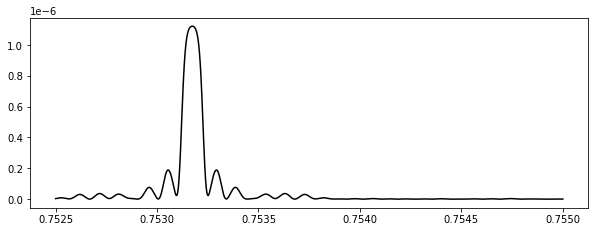

In [115]:
[1] 

lc_count_rate_f = sig.lombscargle(dt, lc_count_rate,w)

plt.figure(figsize = [10,3.5])
plt.plot(w, lc_count_rate_f, c = 'k')
#plt.errorbar(dt, lc_count_rate, lc_count_rate_err, fmt = 'none', c = 'pink')
#plt.xlim(0.7545,0.7550)

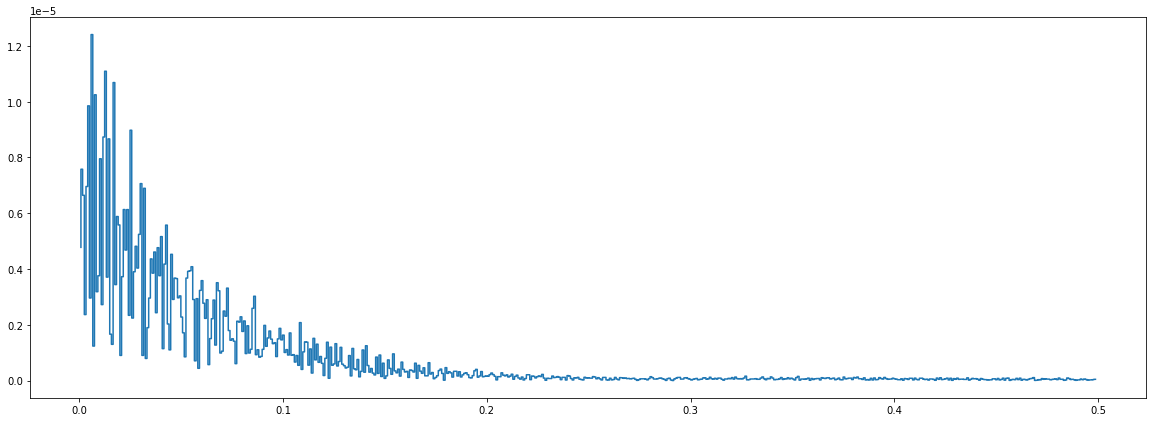

In [208]:
fft_val = abs(fft(lc_count_rate))
freq = fftfreq(len(time))

mask = freq > 0

amp = 2*fft_val/len(time)

freq_trunc = freq[mask][0:len(freq[mask])-1]
amp_trunc = amp[mask][0:len(freq[mask])-1]

plt.figure(figsize = [20,7], facecolor = 'w')
plt.step(freq_trunc, amp_trunc)
#plt.xlim(0,0.1)


In [118]:
n_bin=300
amp5= np.zeros(n_bin)
freq5= [0 for i in range(n_bin)]
for i in range(n_bin):
    freq5[i] = freq[mask][5*i]
for i in range(n_bin):
    for j in range(5):
        #summing all the counts 
        amp5[i] += amp[mask][j+i*5]

plt.figure(figsize = [20,7])

plt.step(freq5,amp5)
plt.xlim(-0.01,0.2)


IndexError: index 40 is out of bounds for axis 0 with size 40